    Topic: Challenge Set 1
    Subject: Explore MTA turnstile data 
    Date: 07/06/2018 
    Name: Jessica Hudiono

In [159]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

from io import StringIO
from matplotlib.pyplot import figure
from matplotlib.dates import DayLocator
from matplotlib.dates import DateFormatter

%matplotlib inline

## Question 1

In [172]:
def url_to_dataframe(url):
    print("Reading", url)
    return pd.read_csv(
        StringIO(requests.get(url).content.decode('utf8')),
        usecols=(lambda c: c not in ['LINENAME', 'DIVISION', 'DESC'])
        # Don't need LINENAME, DIVISION, DESC for the challenge questions
    )

df = url_to_dataframe("http://web.mta.info/developers/data/nyct/turnstile/turnstile_180630.txt")
df.sample(10)

Reading http://web.mta.info/developers/data/nyct/turnstile/turnstile_180630.txt


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS
97814,N526,R142,02-00-00,DELANCEY/ESSEX,06/25/2018,17:00:00,1275697,2335008
119690,PTH20,R549,03-00-03,NEWARK HM HE,06/27/2018,03:41:28,42023,260152
177635,R518,R261,00-00-02,40 ST LOWERY ST,06/24/2018,00:00:00,12188351,7729145
60586,N111,R284,00-00-01,CLINTON-WASH AV,06/27/2018,08:00:00,3646301,1096482
14949,B018,R184,00-00-02,CORTELYOU RD,06/28/2018,08:00:00,5550687,2581184
71244,N215,R237,00-00-01,182-183 STS,06/24/2018,16:00:00,782979,288771
89660,N416,R286,01-05-01,MYRTLE-WILLOUGH,06/29/2018,17:00:00,0,255
45353,N039,R251,01-06-00,96 ST,06/27/2018,04:00:00,589602,153779
111252,PTH03,R552,00-00-09,JOURNAL SQUARE,06/28/2018,23:28:33,955498,831984
134670,R160A,R164,00-05-01,66 ST-LINCOLN,06/25/2018,13:00:00,0,909


In [173]:
df.columns = [column.strip() for column in df.columns]

## Question 2
Combine date and time into a new datetime column.

In [174]:
df['DATETIME_STR'] = df['DATE'] + " " + df['TIME']
df['DATETIME'] = pd.to_datetime(df["DATETIME_STR"], infer_datetime_format=True)
df.drop(columns=["DATETIME_STR"], inplace=True)

print(df['DATETIME'].dtype)
df.sample(10)

datetime64[ns]


,C/A,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME
160833,R285,R308,00-00-01,MT EDEN AV,06/29/2018,00:00:00,508276,411161,2018-06-29 00:00:00
28622,G009,R151,02-00-04,CONEY IS-STILLW,06/24/2018,09:00:00,7038537,10051415,2018-06-24 09:00:00
147722,R226,R131,02-00-00,23 ST,06/26/2018,21:00:00,1998516359,1545564294,2018-06-26 21:00:00
118551,PTH18,R549,01-01-01,NEWARK BM BW,06/29/2018,20:18:52,56466,1955,2018-06-29 20:18:52
25642,D015,R396,00-05-00,AVENUE U,06/23/2018,21:00:00,8,0,2018-06-23 21:00:00
61590,N117,R198,01-00-01,NOSTRAND AV,06/26/2018,16:00:00,41781,56524,2018-06-26 16:00:00
48837,N062A,R010,00-05-01,42 ST-PORT AUTH,06/27/2018,18:00:00,19809611,3487034,2018-06-27 18:00:00
168153,R332,R365,00-00-00,219 ST,06/26/2018,01:00:00,3206180,1097785,2018-06-26 01:00:00
20893,C010,R231,00-00-01,UNION ST,06/25/2018,00:00:00,2158364,422643,2018-06-25 00:00:00
168437,R334,R367,00-00-01,233 ST,06/24/2018,21:00:00,9756469,2301893,2018-06-24 21:00:00


In [ ]:
# where is unit in the hierarchy

## Question 3
Find total daily entries for each turnstile. Each entry accounts for about n=4 hours of traffic.

In [96]:
# Confirmed that SCP id is reused for different C/A, but C/A id is unique across stations. 
assert len(df.groupby(['STATION', 'C/A']).mean()) == len(df['C/A'].unique())

In [97]:
# Confirmed that each turnstile has a single unique row per datetime. 
assert len(df) == len(df.groupby(['STATION', 'C/A', 'SCP', 'DATETIME']).mean())

df_hourly_mean = df.groupby(['STATION', 'C/A', 'SCP', 'DATETIME']).mean()
df_hourly_sum = df.groupby(['STATION', 'C/A', 'SCP', 'DATETIME']).sum()
assert df_hourly_mean.equals(df_hourly_sum)

In [131]:
# Get first and last 'ENTRIES' of the day per turnstile.
df_first = df.groupby(['STATION', 'C/A', 'SCP', 'DATE']).min().reset_index()
df_first.head()

,STATION,C/A,SCP,DATE,TIME,ENTRIES,EXITS,DATETIME
0,1 AV,H007,00-00-00,06/23/2018,00:00:00,13666640,15323756,2018-06-23
1,1 AV,H007,00-00-00,06/24/2018,00:00:00,13669213,15328275,2018-06-24
2,1 AV,H007,00-00-00,06/25/2018,00:00:00,13672052,15331837,2018-06-25
3,1 AV,H007,00-00-00,06/26/2018,00:00:00,13675737,15336054,2018-06-26
4,1 AV,H007,00-00-00,06/27/2018,00:00:00,13679675,15340413,2018-06-27


In [132]:
df_last = df.groupby(['STATION', 'C/A', 'SCP', 'DATE']).max().reset_index()
df_last.head()

,STATION,C/A,SCP,DATE,TIME,ENTRIES,EXITS,DATETIME
0,1 AV,H007,00-00-00,06/23/2018,20:00:00,13668772,15327477,2018-06-23 20:00:00
1,1 AV,H007,00-00-00,06/24/2018,20:00:00,13671606,15331266,2018-06-24 20:00:00
2,1 AV,H007,00-00-00,06/25/2018,20:00:00,13675318,15335546,2018-06-25 20:00:00
3,1 AV,H007,00-00-00,06/26/2018,20:00:00,13679204,15339867,2018-06-26 20:00:00
4,1 AV,H007,00-00-00,06/27/2018,20:00:00,13683213,15344084,2018-06-27 20:00:00


In [133]:
# Subtract the first 'ENTRIES' from the last 'ENTRIES' of the day to get the daily entry.
df_last['DAILY_ENTRIES'] = df_last['ENTRIES'] - df_first['ENTRIES']
df_last.head(15)

,STATION,C/A,SCP,DATE,TIME,ENTRIES,EXITS,DATETIME,DAILY_ENTRIES
0,1 AV,H007,00-00-00,06/23/2018,20:00:00,13668772,15327477,2018-06-23 20:00:00,2132
1,1 AV,H007,00-00-00,06/24/2018,20:00:00,13671606,15331266,2018-06-24 20:00:00,2393
2,1 AV,H007,00-00-00,06/25/2018,20:00:00,13675318,15335546,2018-06-25 20:00:00,3266
3,1 AV,H007,00-00-00,06/26/2018,20:00:00,13679204,15339867,2018-06-26 20:00:00,3467
4,1 AV,H007,00-00-00,06/27/2018,20:00:00,13683213,15344084,2018-06-27 20:00:00,3538
5,1 AV,H007,00-00-00,06/28/2018,20:00:00,13687151,15348038,2018-06-28 20:00:00,3491
6,1 AV,H007,00-00-00,06/29/2018,20:00:00,13691070,15352435,2018-06-29 20:00:00,3437
7,1 AV,H007,00-00-01,06/23/2018,20:00:00,58986357,37283419,2018-06-23 20:00:00,3097
8,1 AV,H007,00-00-01,06/24/2018,20:00:00,58990207,37285190,2018-06-24 20:00:00,3194
9,1 AV,H007,00-00-01,06/25/2018,20:00:00,58995099,37287088,2018-06-25 20:00:00,4293


## Question 4
Plot daily time series for a turnstile. 

In [135]:
turnstile = ts = ("1 AV","H007","00-00-00")

df_td = df_last[(df_last['STATION'] == ts[0]) & (df_last['C/A'] == ts[1]) & (df_last['SCP'] == ts[2])]
df_td.head()

,STATION,C/A,SCP,DATE,TIME,ENTRIES,EXITS,DATETIME,DAILY_ENTRIES
0,1 AV,H007,00-00-00,06/23/2018,20:00:00,13668772,15327477,2018-06-23 20:00:00,2132
1,1 AV,H007,00-00-00,06/24/2018,20:00:00,13671606,15331266,2018-06-24 20:00:00,2393
2,1 AV,H007,00-00-00,06/25/2018,20:00:00,13675318,15335546,2018-06-25 20:00:00,3266
3,1 AV,H007,00-00-00,06/26/2018,20:00:00,13679204,15339867,2018-06-26 20:00:00,3467
4,1 AV,H007,00-00-00,06/27/2018,20:00:00,13683213,15344084,2018-06-27 20:00:00,3538


<Figure size 1440x1440 with 0 Axes>

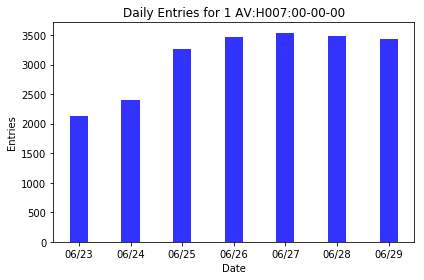

In [171]:
labels = [d.strftime("%m/%d") for d in df_td['DATE']]

plt.figure(figsize = [20, 20])
fig, ax = plt.subplots()
index = np.arange(len(labels))
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, df_td['DAILY_ENTRIES'], bar_width,
                 alpha=opacity,
                 color='b',
                 label=str(ts),
                tick_label=labels)
 
plt.xlabel('Date')
plt.ylabel('Entries')
plt.title("Daily Entries for " + ts[0] + ":" + ts[1] + ":" + ts[2])
 
plt.tight_layout()
plt.show()

## Question 5
Combine turnstiles for each Station/Unit/CA. 